In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data3=pd.read_csv('../input/big-mart-sales-prediction/Train.csv')
data1=pd.read_csv('../input/big-mart-sales-prediction/Test.csv')
print(data3)
print(data1)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

# LET'S UNDERSTAND TRAINING DATA****

CHECK FOR NULL VALUES

In [4]:
data3.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**AS WE CAN SEE THAT Item_Weight  AND Outlet_size CONTAINS NULL VALUES, WE NEED TO GET RID OF IT**

# STATISTICAL DESCRIPTION OF DATA****

In [5]:
data3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
corr_matrix=data3.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

***WE CAN SEE Item_MRP IS CORRELATED TO Item_Outlet_Sales AND REST OTHERS DOES NOT MATTER MUCH***

In [7]:
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('LF','Low Fat')
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('reg','Regular')
data3.Item_Fat_Content=data3.Item_Fat_Content.replace('low fat','Low Fat')


**THERE MUST BE SOME KIND OF TYPO IN tem_Fat_Content AS SAME THING IS WRITTEN IN DIFFERENT WAYS  **

**WE REPLACE NULL VALUES IN Item_Weight WITH MEAN AND Outlet_Size WITH MEDDIUM**

In [8]:
data3['Item_Weight'].fillna(data3['Item_Weight'].mean(), inplace=True)

In [9]:
data3['Outlet_Size']=data3['Outlet_Size'].replace(np.nan,'Medium' )

In [10]:
data3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**SINCE ITEM WEIGHT IS HIGHLY CORRELATED WITH TARGET VARIABLE WE EXPLORE IT GRAPHICALLY**

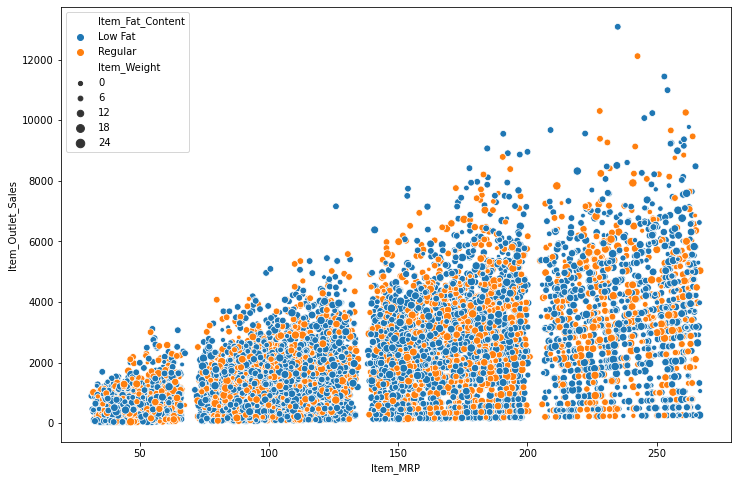

In [11]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=data3)

**NOW WE EXPLORE OTHER COLUMNS**

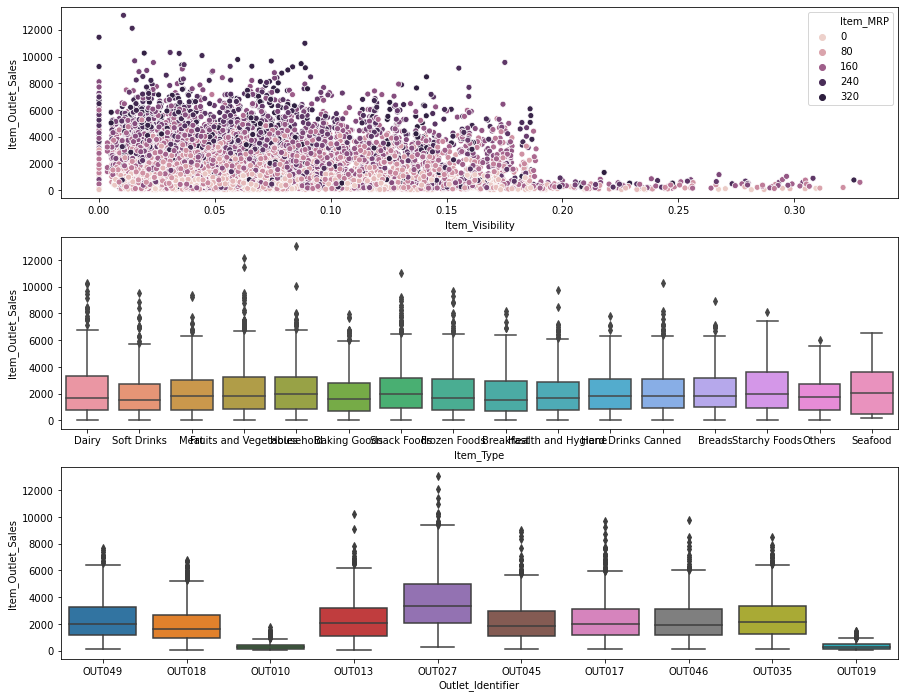

In [12]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=data3)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=data3)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=data3)

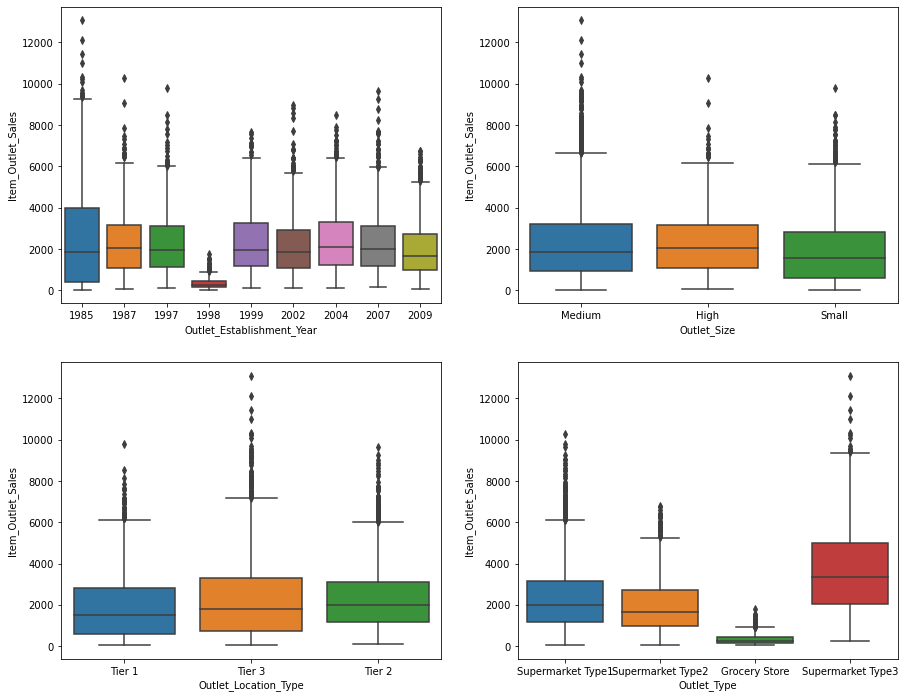

In [13]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=data3)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=data3)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=data3)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=data3)

**AS MODEL CAN TAKE INTEGERS AS INPUT, WE CAN DO LABEL ENCODING FOR THE COLUMNS CONTAINING STRING VALUES**

In [14]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
le1=  LabelEncoder()
data3['Item_Fat_Content']= le.fit_transform(data3['Item_Fat_Content']) 
data3['Item_Type']=le.fit_transform(data3['Item_Type'])
data3['Outlet_Identifier']=le.fit_transform(data3['Outlet_Identifier'])
data3['Outlet_Location_Type']=le.fit_transform(data3['Outlet_Location_Type'])
data3['Outlet_Type']=le.fit_transform(data3['Outlet_Type'])
data3['Item_Identifier']= le.fit_transform(data3['Item_Identifier']) 
data3['Outlet_Size']= le1.fit_transform(data3['Outlet_Size']) 

**HEATMAP**

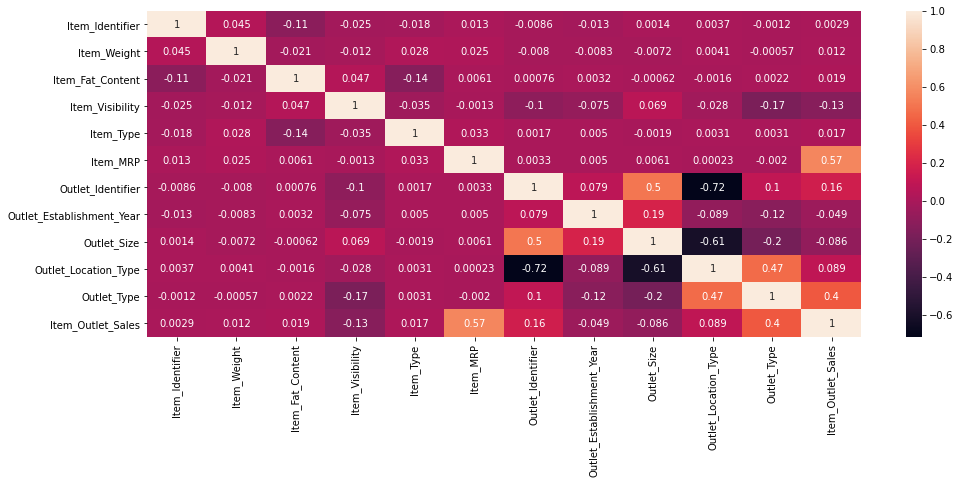

In [15]:
plt.figure(figsize=(16,6))
sns.heatmap(data3.corr(), annot=True)

In [16]:
data3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [17]:
y=data3['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [18]:
x=data3.drop(columns=['Item_Outlet_Sales'])
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


**IMPACT OF Item_Fat_Content ON OUTLET SALES**

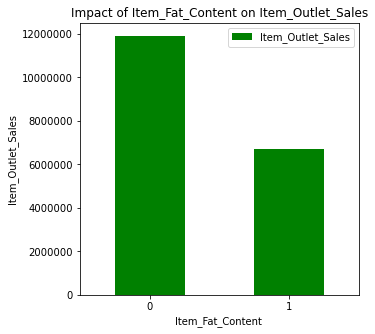

In [19]:
Outlet_Type_pivot = data3.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)
Outlet_Type_pivot.plot(kind='bar', color='GREEN',figsize=(5,5))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style="plain")
plt.show()

**IMPACT OF OUTLET TYPE ON SALES**

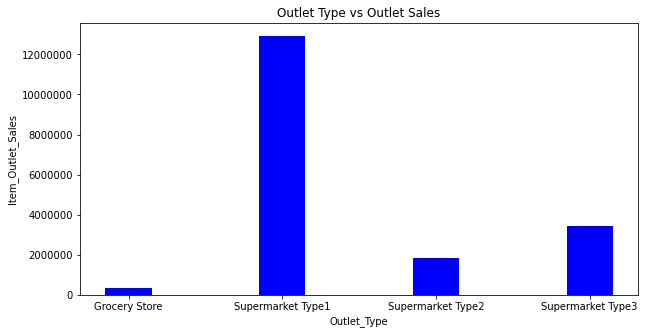

In [20]:
plt.figure(figsize=(10,5))
type2=data3.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
store_types=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
plt.bar(store_types,type2, width=0.3,color='BLUE')
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

**IMPACT OF OUTLET SIZE ON OUTLET SALES**

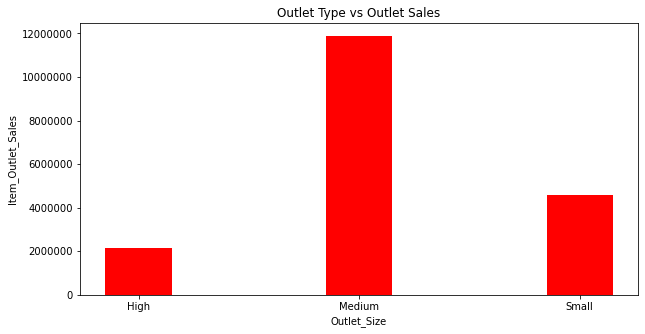

In [21]:
plt.figure(figsize=(10,5))
type3 = data3.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
size = ['High', 'Medium', 'Small']
plt.bar(size, type3, color='RED',width=0.3)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

**SPLITTING OF TRAIN AND TEST DATA WITH TEST SIZE OF 25%**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.25)

In [23]:
X_train.shape , X_test.shape

((6392, 11), (2131, 11))

**FIRTS WE USE LINEAR REGRESSION MODEL**

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error
predict_lr=lr.predict(X_test)
mse=mean_squared_error(Y_test,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1200.3692528756942

**RIDGE**

In [26]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(X_train,Y_train)
predict_r=r.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
r_score=np.sqrt(mse)
r_score

1200.366800673822

**DECISION TREE REGRESSOR**

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
predict_r=dtr.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

1532.2531949764027

**RANDOM FOREST REGRESSOR**

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
predict_r=rf.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
rf_score=np.sqrt(mse)
rf_score

1147.4539869231796

**GRADIENT BOOSTING REGRESSOR**

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
p=gbr.predict(X_test)
gb_score=mean_squared_error(Y_test,p)
gb_score=np.sqrt(gb_score)
gb_score

1079.463609522617

**WE SORT UP THE RMSE VALUES OF ALL THE MODELS USED**

In [30]:
name=['Linear Regression','Ridge Regression',
     'Decision Tree Regression','Random Forest',
     'Gradient Boost']

In [31]:
go=pd.DataFrame({'RMSE':[lr_score,r_score,dtr_score,rf_score,gb_score]},index=name)

In [32]:

go.RMSE.sort_values()

Gradient Boost              1079.463610
Random Forest               1147.453987
Ridge Regression            1200.366801
Linear Regression           1200.369253
Decision Tree Regression    1532.253195
Name: RMSE, dtype: float64

**FROM ABOVE WE FIND OUT THAT GRADIEN BOOSTING REGRESSOR GIVES THE LOWEST RMSE**

**WE PLOT REGRESSION LINE **

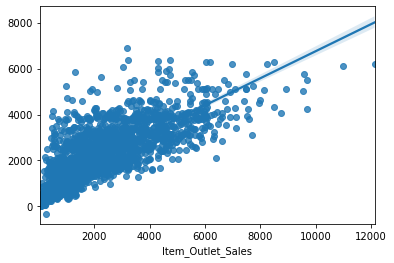

In [33]:
sns.regplot(Y_test, p)

**NOW WE APPLY THE MODEL TO THE TSET DATA PROVIDED BUT WE NEED TO DO ALL FORMS OF PREPROCESSING AS WE DID IN THE TRAIN DATA PROVIDED**

In [34]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [35]:
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('LF','Low Fat')
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('reg','Regular')
data1.Item_Fat_Content=data1.Item_Fat_Content.replace('low fat','Low Fat')
data1['Item_Weight'].fillna(data1['Item_Weight'].mean(), inplace=True)
data1['Outlet_Size']=data1['Outlet_Size'].replace(np.nan,'Medium' )
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [36]:
data1['Item_Fat_Content']= le.fit_transform(data1['Item_Fat_Content']) 
data1['Item_Type']=le.fit_transform(data1['Item_Type'])
data1['Outlet_Identifier']=le.fit_transform(data1['Outlet_Identifier'])
data1['Outlet_Location_Type']=le.fit_transform(data1['Outlet_Location_Type'])
data1['Outlet_Type']=le.fit_transform(data1['Outlet_Type'])
data1['Item_Identifier']= le.fit_transform(data1['Item_Identifier']) 
data1['Outlet_Size']= le1.fit_transform(data1['Outlet_Size']) 

In [37]:
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


In [38]:
predict=gbr.predict(data1)
predict

array([1560.63877573, 1426.20518752,  515.33297237, ..., 1849.70203149,
       3736.87400514, 1296.30926289])

In [39]:
sample=pd.read_csv('../input/big-mart-sales-prediction/Submission.csv')

In [40]:
sample.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [41]:
del sample['Item_Outlet_Sales']

In [42]:
df=pd.DataFrame({'Item_Outlet_Sales':predict})
corr_ans=pd.concat([sample,df],axis=1)
del corr_ans['Unnamed: 0']
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1560.638776
1,FDW14,OUT017,1426.205188
2,NCN55,OUT010,515.332972
3,FDQ58,OUT017,2504.027058
4,FDY38,OUT027,6128.169994
...,...,...,...
5676,FDB58,OUT046,2162.779722
5677,FDD47,OUT018,2637.266070
5678,NCO17,OUT045,1849.702031
5679,FDJ26,OUT017,3736.874005


In [43]:
submit=corr_ans.to_csv('correct.csv',index=None)